<a href="https://colab.research.google.com/github/KSPandian7/mnist-classification/blob/main/deepl3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import cv2

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[2005]

In [ ]:
single_image.shape

(28, 28)

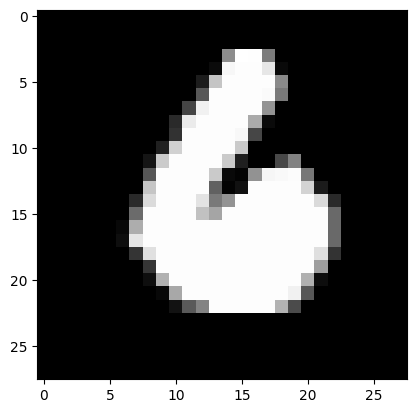

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()


0

In [ ]:
X_train.max()


255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()


0.0

In [ ]:
X_train_scaled.max()


1.0

In [ ]:
y_train[0]


5

In [ ]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [ ]:
type(y_train_onehot)


numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

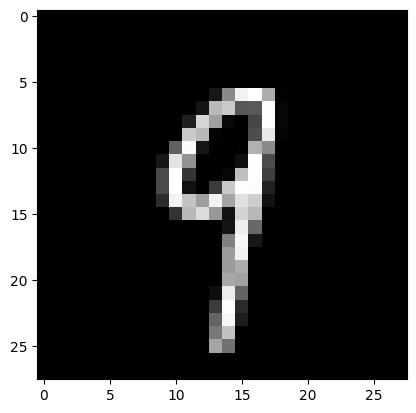

In [ ]:
single_image = X_train[900]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[900]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 32)                147488    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,
          batch_size=32,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0953 - accuracy: 0.9714 - val_loss: 0.0727 - val_accuracy: 0.9764
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0568 - accuracy: 0.9827 - val_loss: 0.0525 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0466 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0385 - val_accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0407 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.0605 -

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.095290,0.971367,0.072687,0.9764
1,0.056766,0.982683,0.052459,0.9829
2,0.042880,0.986183,0.045842,0.9857
3,0.032246,0.990183,0.046577,0.9861
4,0.026839,0.991583,0.038480,0.9886


<Axes: >

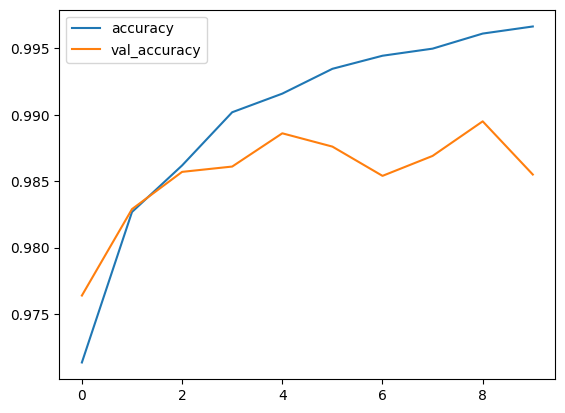

In [ ]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

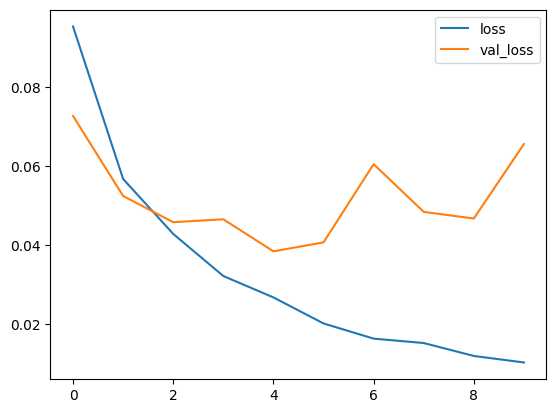

In [ ]:
metrics[['loss','val_loss']].plot()


In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 5ms/step


In [ ]:
print(212222240052, "\nKULASEKARAPANDIAN K")
print(confusion_matrix(y_test, x_test_predictions))

212222240052 
KULASEKARAPANDIAN K
[[ 970    2    2    0    1    0    0    4    0    1]
 [   0 1133    0    0    0    0    0    2    0    0]
 [   0    2 1023    0    0    0    0    7    0    0]
 [   0    0    4  999    0    2    0    3    2    0]
 [   0    0    1    0  979    0    0    0    0    2]
 [   1    0    0    6    0  880    2    2    0    1]
 [   7    2    0    1    5    1  941    0    1    0]
 [   0    2    4    0    0    0    0 1021    1    0]
 [   7    1    9    2    5    1    2    8  934    5]
 [   1    1    0    2   15    2    0   13    0  975]]


In [ ]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('5.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('5.jpg')

In [ ]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 37ms/step


In [ ]:
print(x_single_prediction)


[5]


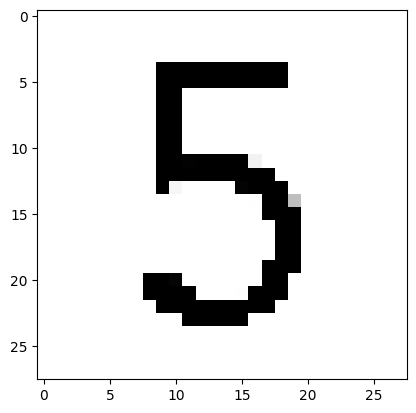

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
print(x_single_prediction)


[5]
